In [1]:
#select where to run this notebook---
binder_or_localpc=True #True: if you want to run the script using binder or in your local PC
google_colab=False #True: if you want to run the script in google colab

In [2]:
%%capture
#!pip freeze. #to list the packages installed in colab
#or install without checking above (!but do it just once)---
if google_colab:
    !pip install numpy
    !pip install matplotlib
    !pip install netcdf4
    !pip install xarray
    !pip install scipy
    !pip install tqdm

In [3]:
#open packages---
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import xarray as xr
import os

In [4]:
#modify the local path in case you run this script in your computer---
if binder_or_localpc:
    main_dir="../"
if google_colab:
    #google colab path:
    mount_point='/content/gdrive/' #dir name for a temporal mount point (just for running this script)
    gdrive_path="MyDrive/colab_repos/" #the path in "my Google Drive" where you have cloned the repo
    main_dir=mount_point+gdrive_path
    #mount:
    from google.colab import drive
    drive.mount(mount_point)

In [5]:
#don't modify below names---
#AGU number:
agu_number="num" #put here the agu manuscript number
#name of the repository:
if binder_or_localpc: 
    dir_repo_name=""
if google_colab:
    #name of directories from the cloned github repo:
    dir_repo_name="paper_Atmospherically_Driven_Seasonal_Interannual_LTTS_MultipleInlet/"
dir_data="data/"
dir_figures="figures/"
#name of file with data:
file_annual_cycle="annual_cycle_Tr_Te_E.nc"

In [6]:
#create dir figures if it does not exists---
if not os.path.exists(main_dir+dir_repo_name+dir_figures):
    os.makedirs(main_dir+dir_repo_name+dir_figures)

In [7]:
#set global parameters for figures---
glob_font_size=11
params = {'legend.fontsize':glob_font_size-4,
          'axes.titlesize':glob_font_size,'axes.labelsize': glob_font_size, #size of titles, x-y labels 
          'xtick.labelsize':glob_font_size-1,'ytick.labelsize':glob_font_size-1, #size of xtick-labels, ytick-labels
          'xtick.major.size':2,'xtick.major.width':.8, #length and width of xticks marks
          'ytick.major.size':2,'ytick.major.width':.8,} #length and width of yticks marks
mpl.rcParams.update(params)

In [8]:
#open data---
ds_annual=xr.open_dataset(main_dir+dir_repo_name+dir_data+file_annual_cycle)
ds_annual

<xarray.Dataset>
Dimensions:    (time: 25290, time_E: 872)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01T08:20:00 ... 2015-10-31T23:45:46
  * time_E     (time_E) datetime64[ns] 1980-01-08T20:25:53 ... 2015-10-23T23:...
Data variables:
    Tr_annual  (time) float64 ...
    Te_annual  (time) float64 ...
    E_annual   (time_E) float64 ...

### plot 

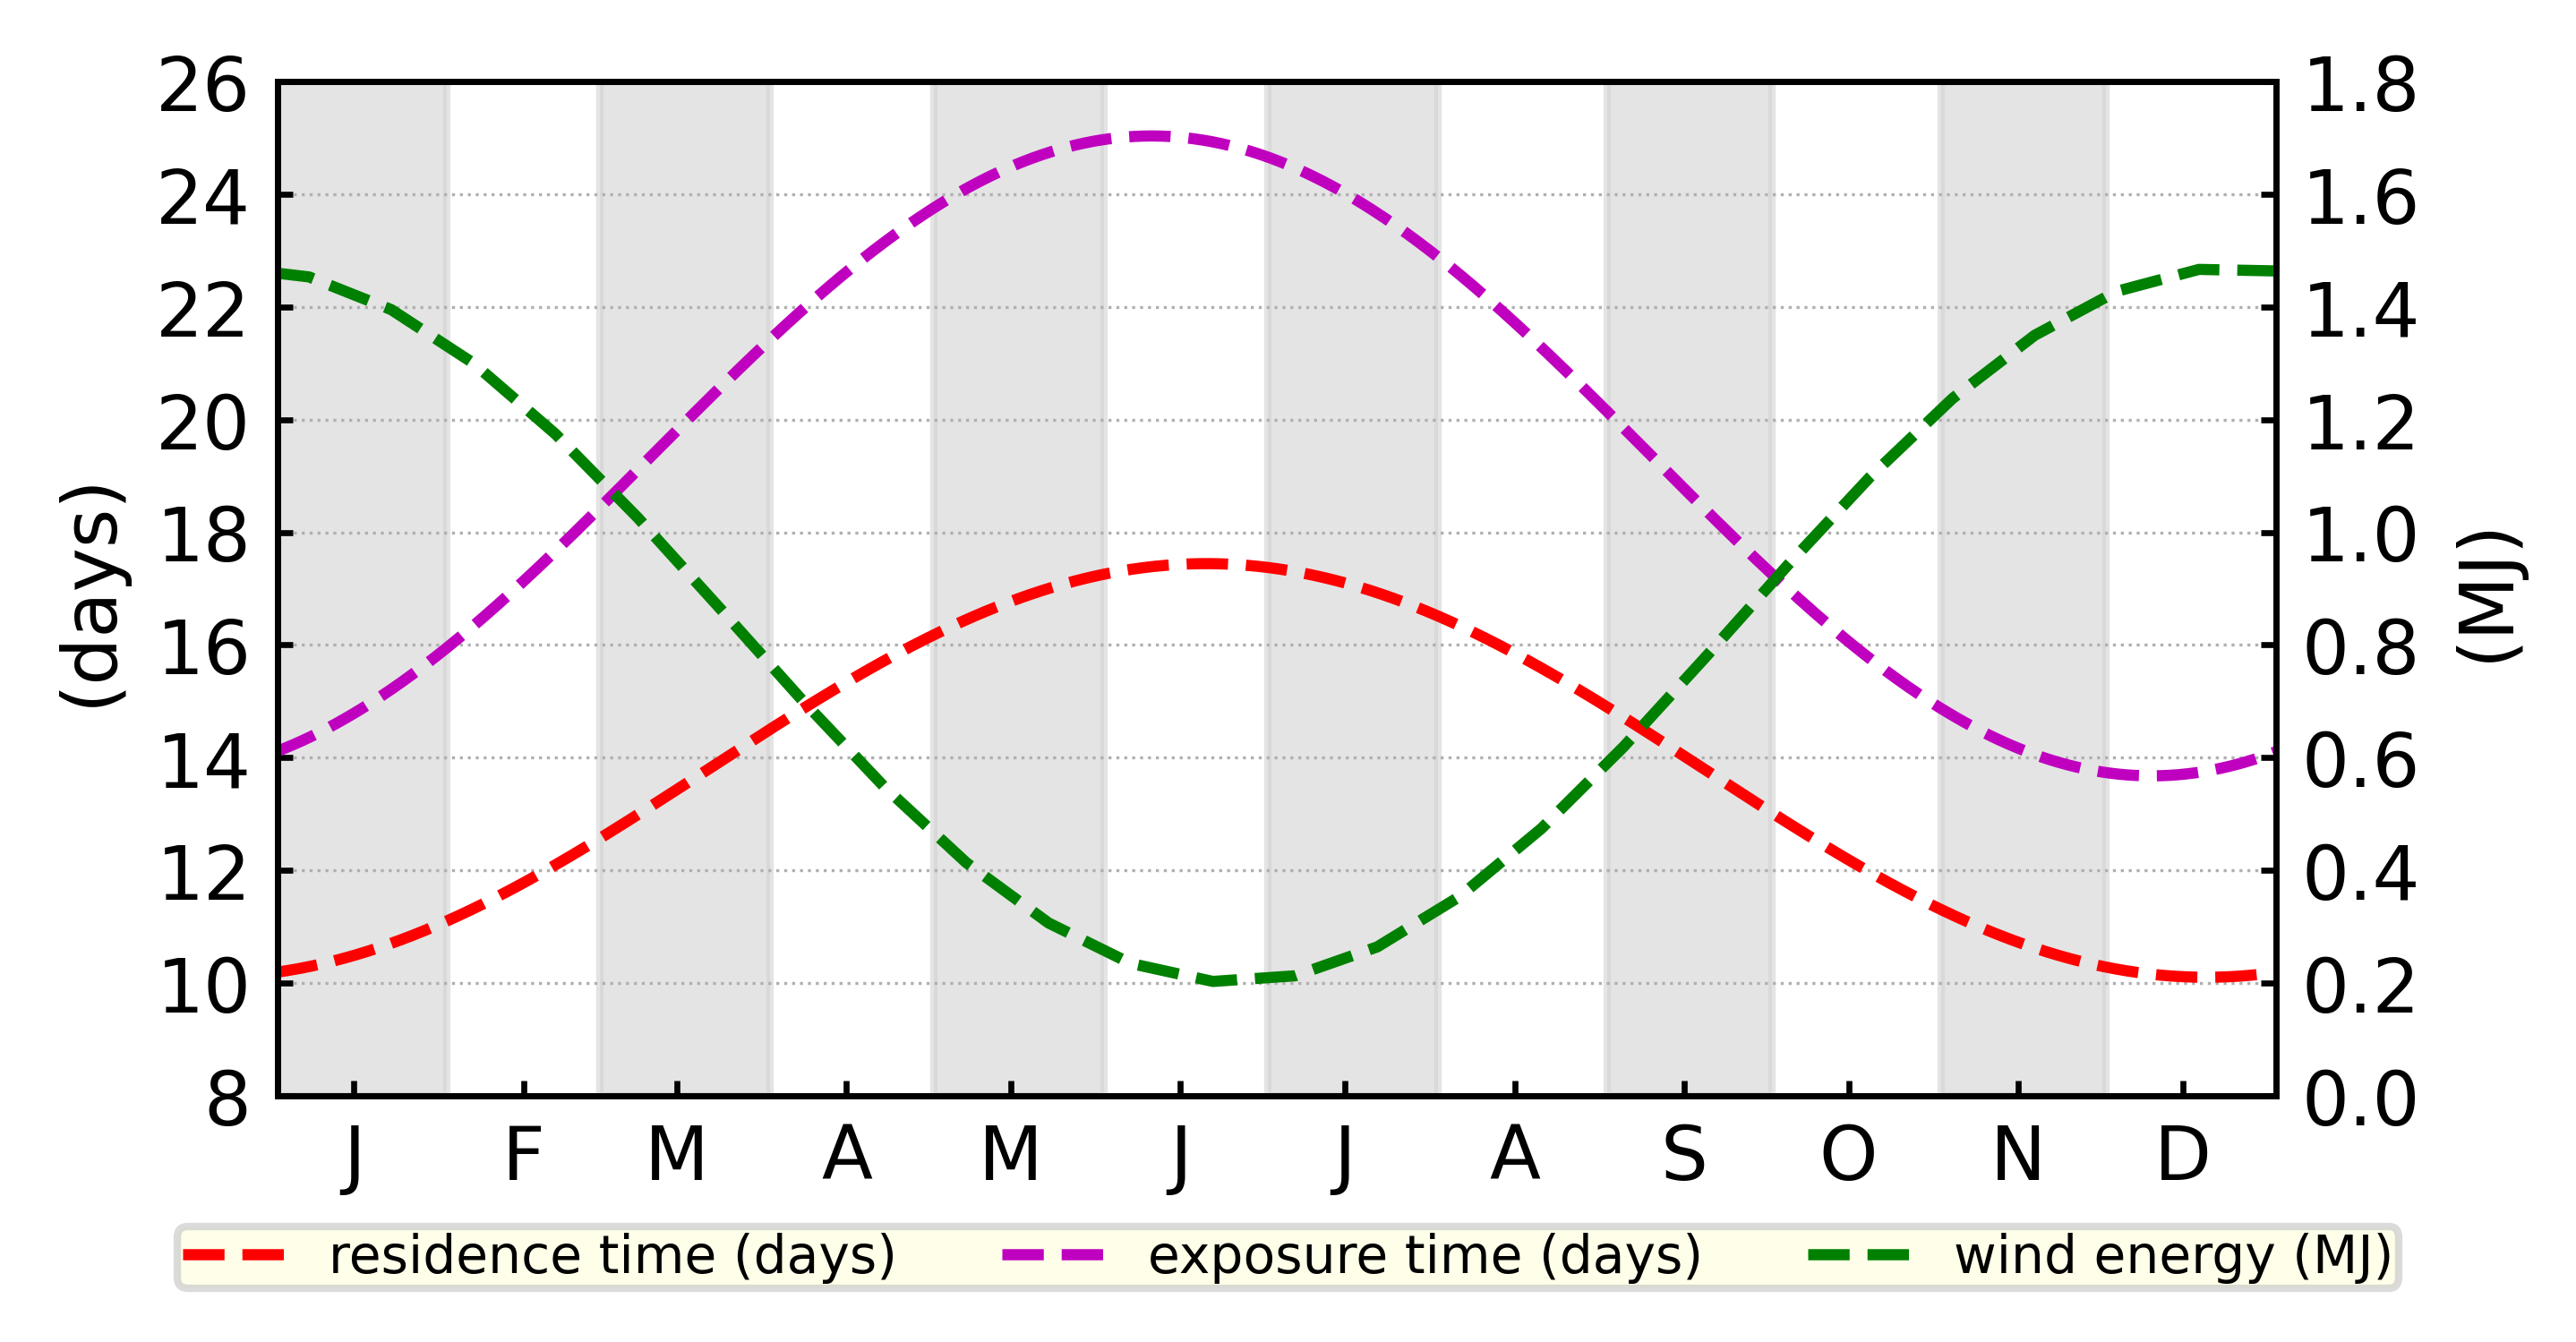

In [9]:
#plotting:
#- annual cycle of Tr and Te from M2-resolution data (the same results if we used Tr_tilde to get annual cycle)
#- annual cycle of wind energy from 15-day-mean data
#
year_ref=np.datetime64("2010-01-01T00:00:00")
xlabels=['J','F','M','A','M','J','J','A','S','O','N','D']
months=range(12)
#
fig,ax=plt.subplots(1,1,figsize=(4.8,2.5),dpi=600)
months=[0,31,28,31,30,31,30,31,31,30,31,30,31]
ini=np.cumsum(months)[::2][:-1]
end=np.cumsum(months)[1:][::2]
for i in range(len(ini)): ax.axvspan(ini[i],end[i],alpha=.6,color='lightgrey')
#Tr
l0,=ax.plot((ds_annual.time-year_ref)/np.timedelta64(1,'s')/86400,ds_annual.Tr_annual,'--r',lw=1.5,label='residence time (days)')
#ax.plot((rt_clim4.month-year_ref)/np.timedelta64(1,'s')/86400,rt_clim4,'or',ms=4)
ax.grid(ls=":",lw=.4,axis='y');ax.set_ylabel("(days)",fontsize=glob_font_size-1);
#ax[0].tick_params(axis='y',colors='r',direction="in")
ax.tick_params(direction="in")
#Te
l1,=ax.plot((ds_annual.time-year_ref)/np.timedelta64(1,'s')/86400,ds_annual.Te_annual,'--m',lw=1.5,label='exposure time (days)')
#ax.plot((et_clim4.month-year_ref)/np.timedelta64(1,'s')/86400,et_clim4,'om',ms=4)
ax.set_yticks(np.arange(8,28,2));ax.set_ylim(8,26)
ax.tick_params(direction="in")
#
ax1=ax.twinx()
l2,=ax1.plot((ds_annual.time_E-year_ref)/np.timedelta64(1,'s')/86400,ds_annual.E_annual,'--g',lw=1.5,label='wind energy (MJ)')
#ax1.plot((we_clim4.month-year_ref)/np.timedelta64(1,'s')/86400,we_clim4,'og',ms=4)
#
ax1.set_yticks(np.arange(0,2,.2));ax1.set_ylim(0,1.8);
ax1.set_ylabel("(MJ)",fontsize=glob_font_size-1);
xticks=([np.datetime64(f"{str(year_ref)[:4]}-{i:02d}-15") for i in range(1,13)]-year_ref)/np.timedelta64(1,'s')/86400
ax1.set_xticks(xticks);ax1.set_xticklabels(xlabels);
ax1.tick_params(direction="in")
ax1.set_xlim(0,365);
#ax1.spines['right'];
#
ax.legend(handles=[l0,l1,l2],loc=(-.05,-.19),ncol=3,framealpha=.7,facecolor='lightyellow', borderpad=0.1);
#
fig_name='f03'
fig.savefig(f'{main_dir}{dir_repo_name}{dir_figures}{agu_number}-{fig_name}.jpg',bbox_inches='tight',pad_inches=0.1,dpi=600)
#fig.savefig(f'{main_dir}{dir_repo_name}{dir_figures}{agu_number}-{fig_name}.pdf',bbox_inches='tight',pad_inches=0.1,dpi=600)